#  Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

''The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same''. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

In [22]:
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt


file_path

In [23]:
# Load the features store dataset as dataframe

file_path = r"wafer_data.csv"
wafers_df = pd.read_csv(file_path)
print("Shape of the feature store dataset: ", wafers_df.shape)

Shape of the feature store dataset:  (100, 592)


In [24]:
wafers_df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [25]:
wafers_df.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [26]:
# IN columns 1 columns is unnamed so we rename it as wafer
wafers_df.rename(columns={"Unnamed: 0":"Wafer"}, inplace=True)

In [27]:
# Train test split 

from sklearn.model_selection import train_test_split

wafers_train ,wafer_test = train_test_split(wafers_df,test_size=.2, random_state=42)


# Basic stats

In [28]:
# show the basic stats of numerical columns
wafers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [29]:
wafers_df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [30]:
wafers_df["Good/Bad"].value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

# Insights 
- the count of -1 is 94
- the count of 1 is 6

which show the heavily imbalanced data . So we do the resampling.

# Analyze Missing Data


In [31]:
# check the missing values 
wafers_df.isnull().sum()

Wafer         0
Sensor-1      1
Sensor-2      0
Sensor-3      3
Sensor-4      3
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

### Insights
- data has some missing valuse in sensors

In [32]:
# In others columns contains null values total 
wafers_df.isna().sum().sum()

2306

In [33]:
## Check missing vals in dependent feature variables

wafers_df.isna().sum().sum() / (wafers_df.shape[0] * (wafers_df.shape[1] - 1))

0.03901861252115059

- Almost 4% out of total cells we're having missing values.

So we try all sort of imputation strategies and would choose the one with that's gonna give us least overall-error-val


In [34]:
wafers_df.shape

(100, 592)

In [35]:
wafers_df.columns

Index(['Wafer', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5',
       'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

## Analyzing the missing values 

In [36]:
# Check the nulls in target value
wafers_df['Good/Bad'].isna().sum()

0

In [37]:
#but the others columns 
wafers_df.isna().sum().sum()


2306

In [38]:
wafers_df.dtypes

Wafer          object
Sensor-1      float64
Sensor-2      float64
Sensor-3      float64
Sensor-4      float64
               ...   
Sensor-587    float64
Sensor-588    float64
Sensor-589    float64
Sensor-590    float64
Good/Bad        int64
Length: 592, dtype: object

In [39]:
count =0
for dtype in wafers_df.dtypes:
    if dtype =='object':
        wafers_df.dtypes
        count+=1
count

1

In [40]:
wafers_df['Wafer-801']

KeyError: 'Wafer-801'

### Create a model when the drop the na value

In [ ]:
wafers_df.shape[0] 

100

In [ ]:
wafers_df.shape[1]

592

In [ ]:
# check the percentage of na value in dataset
wafers_df.isna().sum().sum() /  (wafers_df.shape[0] * (wafers_df.shape[1] - 1))


0.03901861252115059

###### Only 4% missing so remove

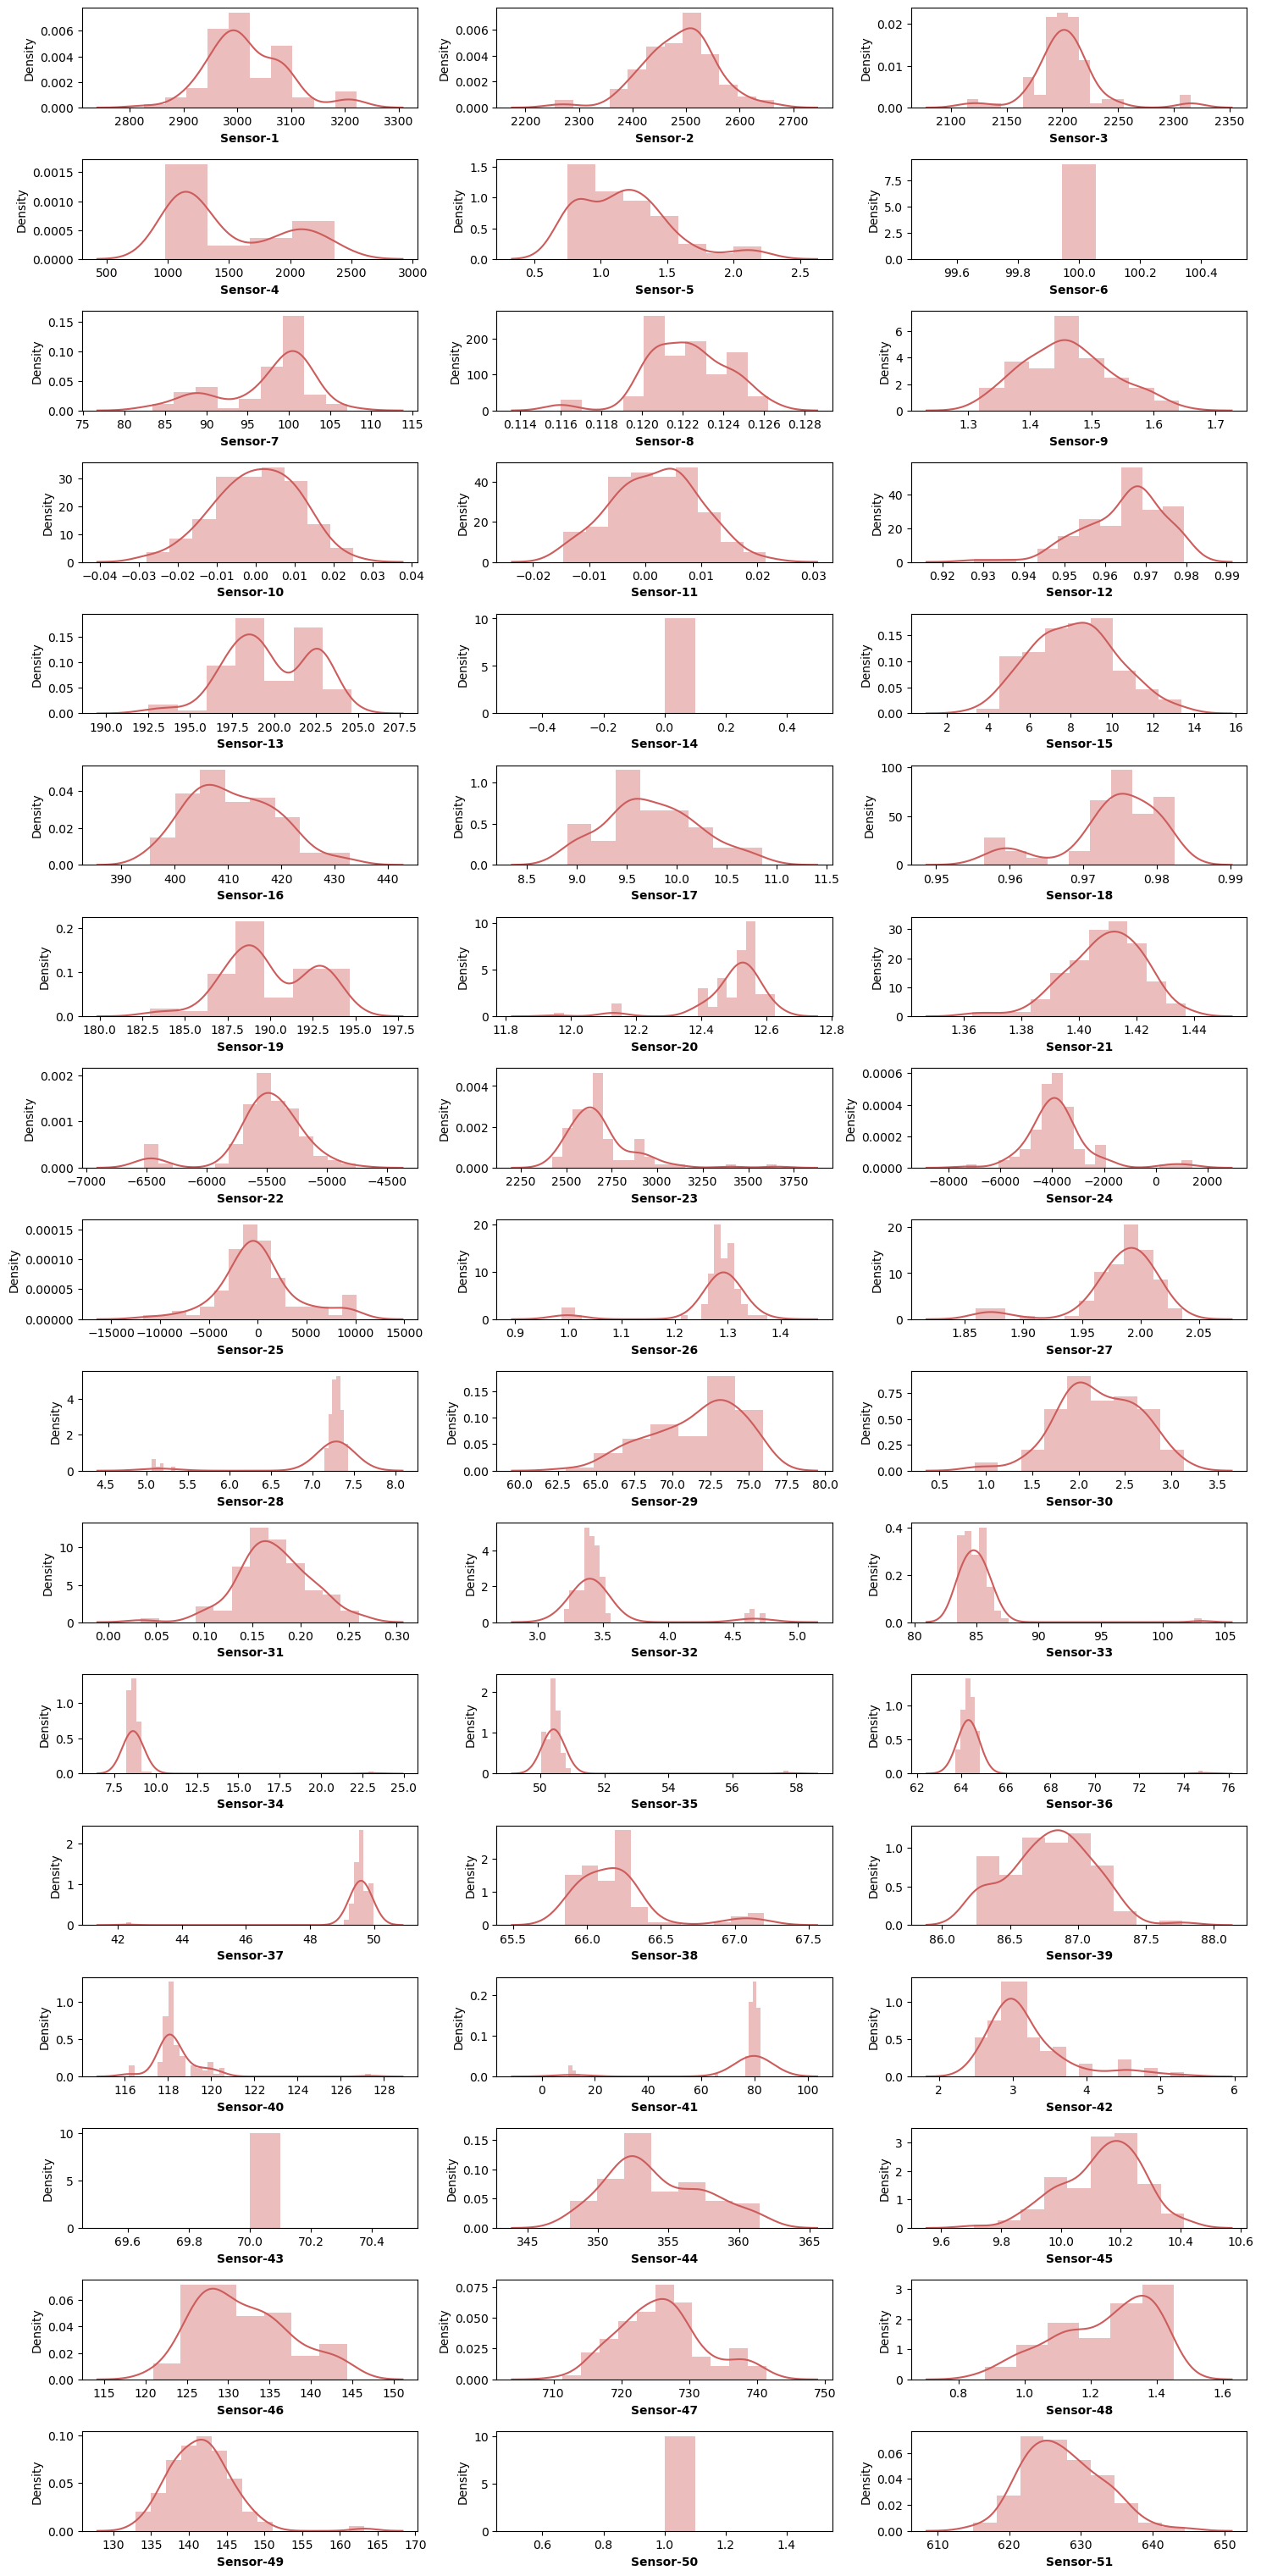

In [41]:
# fisrt check the data visualiztion 
import numpy as np
plt.figure(figsize=(15, 107))

for i, col in enumerate(wafers_df.columns[1:52]):
    plt.subplot(60, 3, i+1)
    sns.distplot(   x = wafers_df[col], color="indianred")
    plt.xlabel(col, weight ="bold")
    plt.tight_layout()

In [42]:
# select 50 random features so reduce times 
random_index_50 = []

for i in range(1,51):
    if i not in random_index_50:
        random_index_50.append(np.random.randint(1,591))
random_index_50

[512,
 535,
 337,
 320,
 485,
 272,
 287,
 351,
 328,
 396,
 477,
 285,
 573,
 162,
 46,
 182,
 280,
 476,
 482,
 364,
 546,
 491,
 77,
 524,
 266,
 362,
 536,
 524,
 18,
 583,
 384,
 148,
 244,
 405,
 297,
 190,
 42,
 282,
 252,
 474,
 185,
 577,
 198,
 347,
 478,
 518,
 3,
 380]

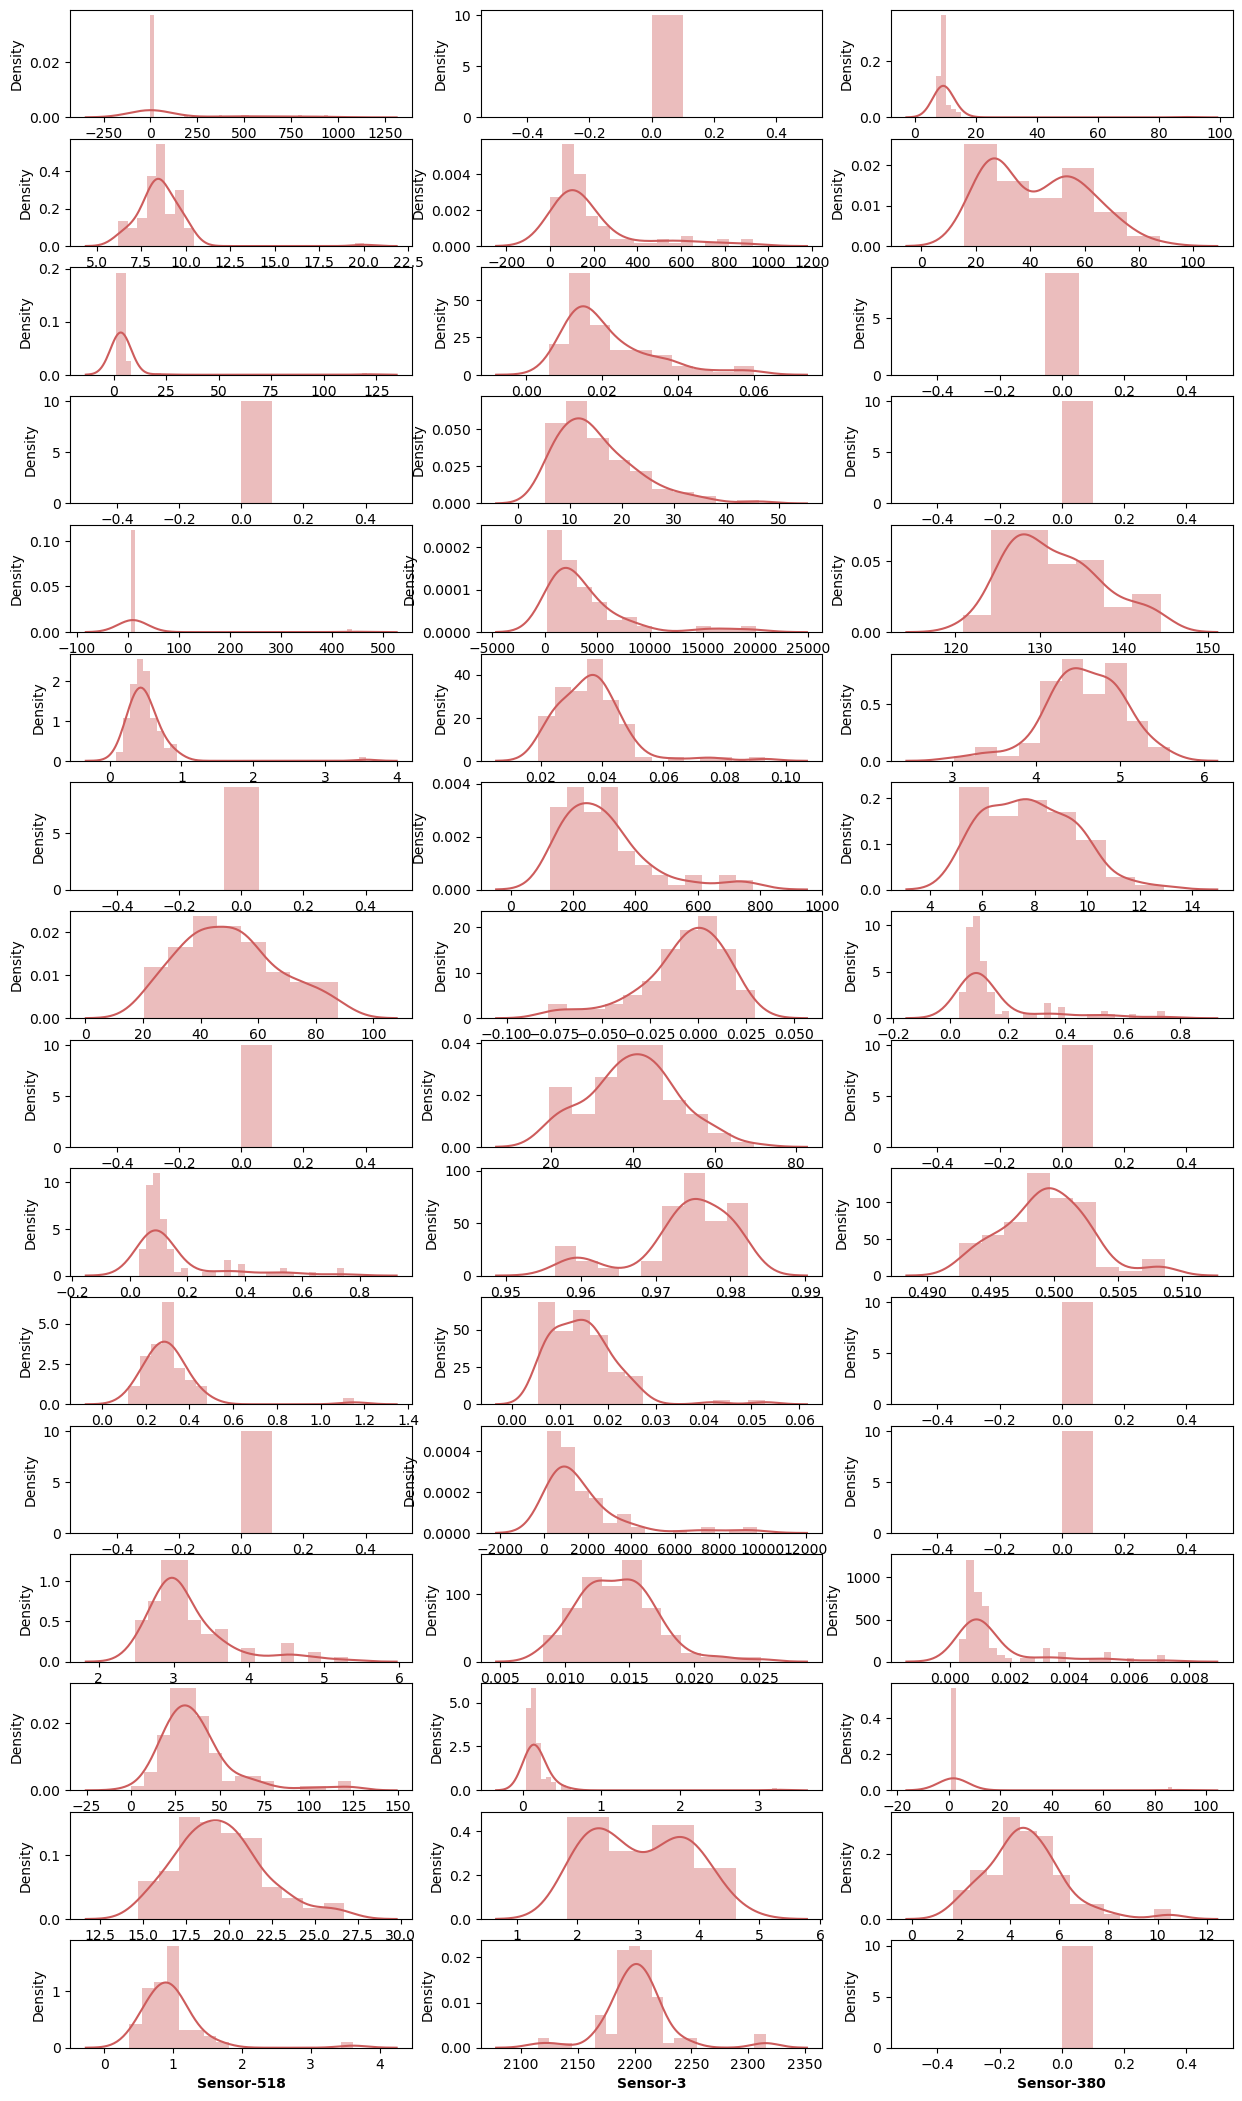

In [43]:
plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers_df.columns[random_index_50]):
    plt.subplot(60,3, i+1)
    sns.distplot(x= wafers_df[col], color='indianred')
    plt.xlabel(col, weight ='bold')
    plt.tight_layout()

### Insight:

Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we oughta depend upon the scaling. 

For the **features with 0 standard deviation**, we can straight away drop them and for others that do have outliers, we gotta go ahead with the `Robust Scaling`.

### # Get Columns to Drop:

Will drop columns with zero standard deviation as they are not influencing the target variable in any way.

In [45]:
def get_col_with_zero_std_dev(df: pd.DataFrame):
    """
    args: 
        df : DataFrame
    return:
        col: List

    Returns a list of columns names who are having 
    zero standard deviation.

    """
    col_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype !='O']

    for col in num_cols:
        if df[col].std()== 0:
            col_to_drop.append(col)
        return col_to_drop
    

def get_missing_cols(df: pd.DataFrame, missing_threshold=0.7):
    """
    args:
        df: Dataframe -> dataset pass
        missing_threshold:
    Return:
         cols : List

    Return a list of columns having missing values more than certain theshold

    """
    cols_missogm_ratios = df.isna().sum().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop


In [46]:
## columns with missing values more than 70%
colo_to_drop_1 = get_missing_cols(wafers_df, missing_threshold=0.7)
colo_to_drop_1

AttributeError: 'numpy.int64' object has no attribute 'div'

In [48]:
## Columns w 0 Standard Deviation

cols_to_drop_2 = get_col_with_zero_std_dev(df=wafers_df)
cols_to_drop_2.append("Wafer")
cols_to_drop_2

['Wafer']

In [49]:
# cols to drop 

colo_to_drop = colo_to_drop_1 + cols_to_drop_2

NameError: name 'colo_to_drop_1' is not defined